In [34]:
from src.attack_network import *
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.font_manager import FontProperties

In [12]:
num_samples, num_divisions = 200, 1000
df_nodes, df_remove = random_attack_samples(num_samples, num_divisions)

In [13]:
df_nodes_mean, df_remove_mean = random_attack_mean(df_nodes, df_remove)
#df_nodes_mean,df_nodes_mean = pd.read_csv("../data/attack_network/N_node_random_attack.csv",delimiter=","),pd.read_csv("../data/attack_network/N_remove_random_attack.csv",delimiter=",")

In [ ]:
df_malicious = pd.read_csv("../data/attack_network/malicious_degree.csv",delimiter=",")

In [19]:
index_range_1 = []
index_range_2 = []
for i in range(len(df_malicious)):
    if(df_malicious["N_remove"].values[i]<=0.05):
        index_range_1.append(i)
    else:
        index_range_2.append(i)
N_nodes = []
N_remove = []
factor = int(len(index_range_1)/20)
for i in range(len(index_range_1)):
    if(are_multiples(index_range_1[i], factor)==True):
        N_remove.append(df_malicious["N_remove"].values[index_range_1[i]])
        N_nodes.append(df_malicious["N_nodes"].values[index_range_1[i]])
factor_2 = len(index_range_2)/8

for i in range(len(index_range_2)):
    if(are_multiples(index_range_2[i], factor_2)==True):
        N_remove.append(df_malicious["N_remove"].values[index_range_2[i]])
        N_nodes.append(df_malicious["N_nodes"].values[index_range_2[i]])

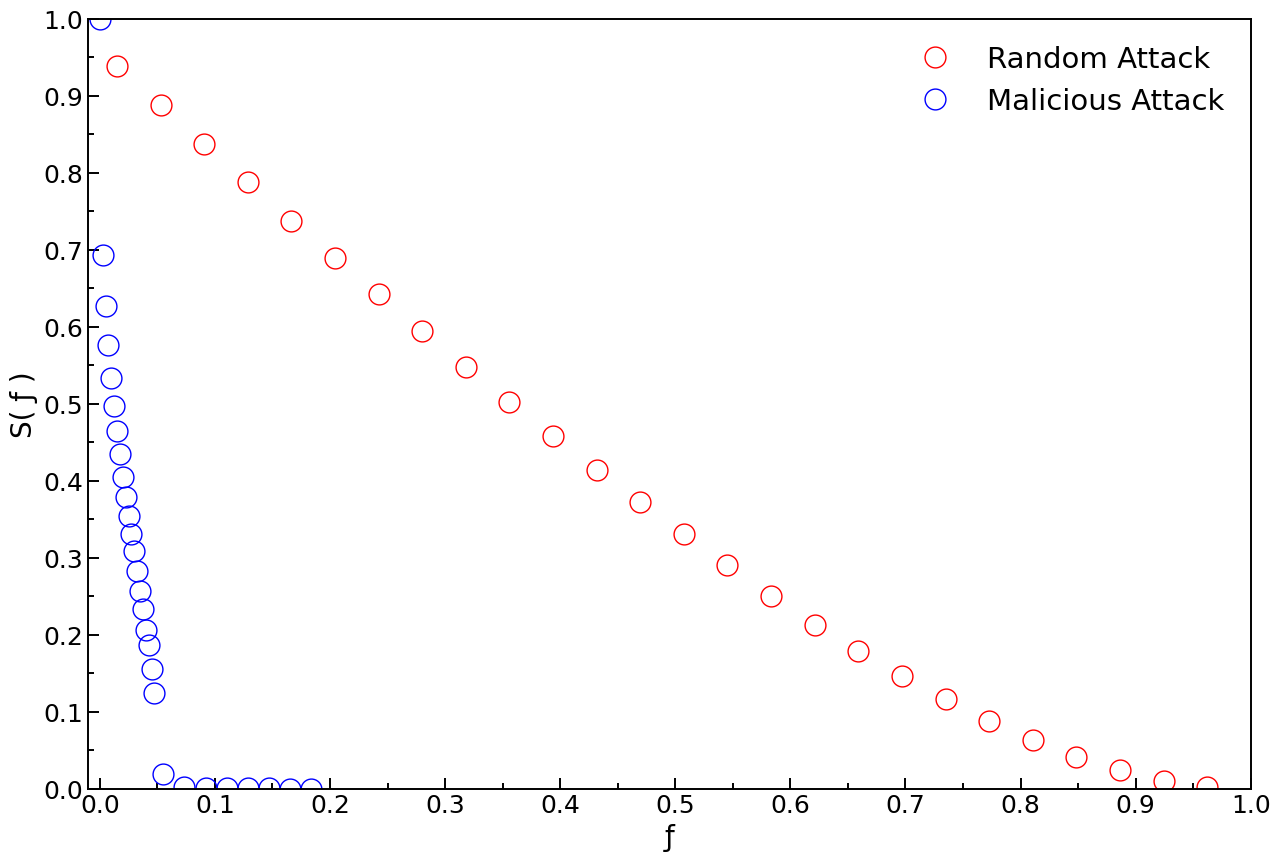

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
markersize=15

# ax.errorbar(df_remove_mean["N_remove"].values, df_nodes_mean["N_nodes"].values, 
#             yerr=df_nodes_mean["N_error"].values,fmt="o",markersize=markersize,mfc='none',
#             mec="red",label="Random Attack")
ax.plot(df_remove_mean["N_remove"].values, df_nodes_mean["N_nodes"].values, 
            "o",markersize=markersize,mfc='none',
            mec="red",label="Random Attack")
ax.plot(N_remove,N_nodes,"o",markersize=markersize,mfc='none',
            mec="blue",label="Malicious Attack")
#ax.plot(df_malicious["N_remove"].values,df_malicious["N_nodes"].values,"o",markersize=markersize,mfc='none',
        #mec="blue",label="Malicious Attack")
#
ax.set_xlabel('\u0192',size=20)
ax.set_ylabel("S( \u0192 )",size=20)
ax.set_xlim([-0.01,1])
ax.set_ylim([0,1])
ax.xaxis.set_minor_locator(MultipleLocator(.05))
ax.yaxis.set_minor_locator(MultipleLocator(.05))
ax.tick_params(which='minor', width=1.4, length=4,direction="in",labelsize=18)
ax.tick_params(which='major', width=1.4, length=8,direction="in",labelsize=18)
ax.legend(prop={"size":21},fancybox=True, framealpha=0.0)
ax.set_xticks(np.arange(0, 1.1, step=.1))  # Specify the positions of ticks
ax.set_yticks(np.arange(0, 1.1, step=.1))  # Specify the positions of ticks
plt.savefig("../results/attack_network.pdf")
plt.show()